# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

Files already downloaded and verified
Files already downloaded and verified


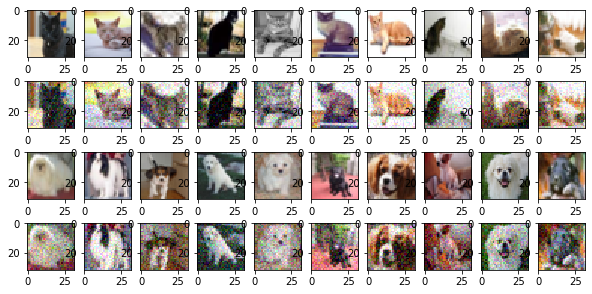

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# 1a
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False, num_workers=2)

# 1b
scale = 0.2
def getNoiseSet(loader):
    torch.manual_seed(1722878)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    noise_set = images + torch.randn(images.size()) * scale
    noise_set_np = noise_set.numpy()
    return np.clip(noise_set_np, -1, 1)
train_noise = torch.from_numpy(getNoiseSet(trainloader))
test_noise = torch.from_numpy(getNoiseSet(testloader))

# 1c we can extract the subset of catdog with noise, without noise, in training datas, in test datas and in whole dataset.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# the function is used to return corresponding class subset and the class set corresponding index in the whole set
def getClassData(loader, label_val):
    torch.manual_seed(1722878)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    # get corresponding index
    index_class = torch.from_numpy((labels == label_val).nonzero().numpy().flatten())
    # get corresponding class
    set_cls = torch.index_select(images, 0, index_class)
    return (set_cls, index_class)

train_cat, index_train_cat = getClassData(trainloader, 3)
test_cat, index_test_cat= getClassData(testloader, 3)
# get the whole cat dataset
set_cat = torch.cat([train_cat,test_cat],dim=0)

train_dog, index_train_dog = getClassData(trainloader, 5)
test_dog, index_test_dog = getClassData(testloader, 5)
# get the whole dog dataset
set_dog = torch.cat([train_dog,test_dog],dim=0)

# get the train dataset of catdog
train_catdog = torch.cat([train_cat,train_dog],dim=0)
# get the test dataset of catdog
test_catdog = torch.cat([test_cat,test_dog],dim=0)
# get the total dataset of catdog
whole_catdog = torch.cat([set_cat,set_dog],dim=0)

# get cat labels
label_train_cat = torch.from_numpy(np.ones(train_cat.numpy().shape[0])*3)
label_test_cat = torch.from_numpy(np.ones(test_cat.numpy().shape[0])*3)
label_train_dog = torch.from_numpy(np.ones(train_dog.numpy().shape[0])*5)
label_test_dog = torch.from_numpy(np.ones(test_dog.numpy().shape[0])*5)
label_cat = torch.cat([label_train_cat,label_test_cat],dim=0)
label_dog = torch.cat([label_train_dog,label_test_dog],dim=0)
label_train_catdog = torch.cat([label_train_cat,label_train_dog],dim=0)
label_test_catdog = torch.cat([label_test_cat,label_test_dog],dim=0)
label_catdog = torch.cat([label_cat,label_dog],dim=0)

# get the train dataset of catdog with original format
trainset_catdog = torch.utils.data.TensorDataset(train_catdog, label_train_catdog)
trainloader_catdog = torch.utils.data.DataLoader(trainset_catdog, batch_size = 10000, shuffle = False, num_workers = 2)
# get the test dataset of catdog with original format
testset_catdog = torch.utils.data.TensorDataset(test_catdog, label_test_catdog)
testloader_catdog = torch.utils.data.DataLoader(testset_catdog, batch_size = 2000, shuffle = False, num_workers = 2)
# get the whole dataset of catdog with original format
wholeset_catdog = torch.utils.data.TensorDataset(whole_catdog, label_catdog)
wholeloader_catdog = torch.utils.data.DataLoader(wholeset_catdog, batch_size = 12000, shuffle = False, num_workers = 2)

# get the train cat dataset with noise
noise_train_cat = torch.index_select(train_noise, 0, index_train_cat)
noise_test_cat = torch.index_select(test_noise, 0, index_test_cat)
set_noise_cat = torch.cat([noise_train_cat,noise_test_cat],dim=0)

# get the train dog dataset with noise
noise_train_dog = torch.index_select(train_noise, 0, index_train_dog)
noise_test_dog = torch.index_select(test_noise, 0, index_test_dog)
set_noise_dog = torch.cat([noise_train_dog,noise_test_dog],dim=0)

# get the train dataset of noise catdog
noise_train_catdog = torch.cat([noise_train_cat,noise_train_dog],dim=0)
# get the test dataset of noise catdog
noise_test_catdog = torch.cat([noise_test_cat,noise_test_dog],dim=0)
# get the total dataset of noise catdog
noise_whole_catdog = torch.cat([set_noise_cat,set_noise_dog],dim=0)

# get the train noise dataset of catdog with original format
noise_trainset_catdog = torch.utils.data.TensorDataset(noise_train_catdog, label_train_catdog)
noise_trainloader_catdog = torch.utils.data.DataLoader(noise_trainset_catdog, batch_size = 10000, shuffle = False, num_workers = 2)
noise_testset_catdog = torch.utils.data.TensorDataset(noise_test_catdog, label_test_catdog)
noise_testloader_catdog = torch.utils.data.DataLoader(noise_testset_catdog, batch_size = 2000, shuffle = False, num_workers = 2)
noise_wholeset_catdog = torch.utils.data.TensorDataset(noise_whole_catdog, label_catdog)
noise_wholeloader_catdog = torch.utils.data.DataLoader(noise_wholeset_catdog, batch_size = 12000, shuffle = False, num_workers = 2)

# 1d
def imgshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plt.figure(figsize=(10, 5))
show_datas = torch.cat([set_cat[0:10], set_noise_cat[0:10], set_dog[0:10], set_noise_dog[0:10]], dim=0)
for i in range(1,41):
    plt.subplot(4,10,i)
    imgshow(torchvision.utils.make_grid(show_datas[i-1]))
plt.show()

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


We can choose one of the k values according to cumulative variance.

We can get no_components with 32.

Then we can choose the following 7 k values with different magnitudes to see different effects, k1=1,k2=5,k3=10,k4=32,k5=100,k6=300,k7=1000.

And we can use k_set to show the 7 k values.

[   1    5   10   32  100  300 1000]
I choose the Gaussian, because the distribution of the sample feature values is mostly continuous not discrete

[0.5935, 0.5185, 0.572, 0.5665, 0.618, 0.5875, 0.57, 0.5685]


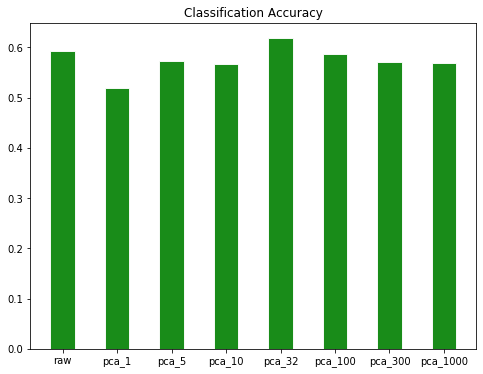

[0.593, 0.518, 0.572, 0.566, 0.618, 0.588, 0.57, 0.568]


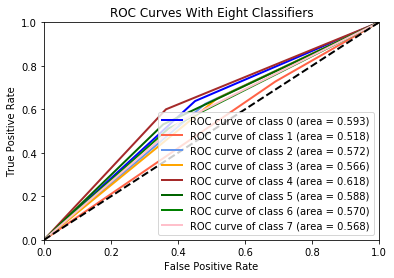

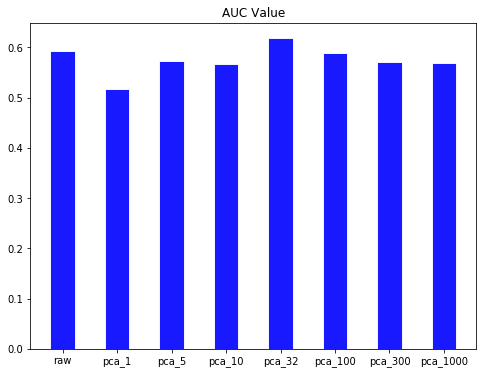

Three observations:

The first is about the accuracy,if I choose 1, the accuracy will be smaller than 0.52.
However, when I choose 32 as the components number, the accuracy is greatest in the 7 values.
When the k increases after 32, the accuracy would decline slowly.

The second is about the ROC curve.
All the ROC curves have a turning point.
And all the turning point is above the dash line.
When a turning point is more in the above, it means the accuracy is greater.

The last is about the auc.
The value of AUC is same with the value of accuracy.
'1 - auc' is the corresponding value of the cat class.
Except the auc value of the second one and the fifth one, the remaining 6 auc value is around 0.57.


In [3]:
## from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import torch.nn as nn
import torch.nn.functional as F

## 2a
# choose the k values according to cumulative variance
print("We can choose one of the k values according to cumulative variance.\n")
x_train, y_train = iter(trainloader_catdog).next()
catdog_np = x_train.numpy()
h_catdog, w_catdog, c_catdog = catdog_np.shape[1:]
catdog_reshape=catdog_np.reshape((catdog_np.shape[0],h_catdog*w_catdog*c_catdog))
pca= PCA()
pca.fit(catdog_reshape)
no_components=0
total= sum(pca.explained_variance_)
current_sum=0

while current_sum/total < 0.8:
    current_sum += pca.explained_variance_[no_components]
    no_components +=1
    
print("We can get no_components with 32.\n")
print("Then we can choose the following 7 k values with different magnitudes to see different effects, k1=1,k2=5,k3=10,k4=32,k5=100,k6=300,k7=1000.\n")
print("And we can use k_set to show the 7 k values.\n")
no_components = 32
k_set = [1, 5, 10, 32, 100, 300, 1000]
k_set = np.array(k_set)
print(k_set)
 
# 2b 
print("I choose the Gaussian, because the distribution of the sample feature values is mostly continuous not discrete\n")
Y_train = y_train.numpy().flatten()
x_test, y_test = iter(testloader_catdog).next()
x_test_np = x_test.numpy()
Y_test = y_test.numpy().flatten()
test_catdog_reshape=x_test_np.reshape((x_test_np.shape[0],x_test_np.shape[1]*x_test_np.shape[2]*x_test_np.shape[3]))

score_list = [] # classification accuracy list
pre_list = [] # prediction test label list

def getAccuracy(X, Xt):
    # training NBC
    nbc = GaussianNB()
    nbc.fit(X,Y_train)
    # use test set to predict the accuracy
    Xt_pred = nbc.predict(Xt)
    pre_list.append(Xt_pred)
    cur_accuracy = metrics.accuracy_score(Y_test, Xt_pred)
    score_list.append(cur_accuracy)

# get the first prediction accuracy with the original data
getAccuracy(catdog_reshape, test_catdog_reshape)
# train the remaining 7 NBCs and get the classification accuracy
for k in k_set: 
    # start to use PCA
    pca_object = PCA(n_components = k)
    X_intmde_train = pca_object.fit_transform(catdog_reshape)
    XT_intmde_train = pca_object.transform(test_catdog_reshape)
    getAccuracy(X_intmde_train, XT_intmde_train)
print(score_list)

# 2c
# visualise their performance
plt.figure(figsize=(8,6)) 
X = ['raw','pca_1','pca_5','pca_10','pca_32','pca_100','pca_300','pca_1000']
X_np = np.array(X)
Y = np.array(score_list)
plt.bar(X_np, Y, alpha=0.9, width = 0.45, facecolor = 'green', edgecolor = 'white')
plt.title('Classification Accuracy')
plt.show()
# we can see the origin data's accuracy is the highest which is 0.5935, the ramaining value is similar 
# and most of them is greater than 0.55, only one is smaller than 0.55

# 2d 2e
AUC = []
fpr_total = []
tpr_total = []
# calculate auc
for i in range(8):
    fpr, tpr, thresholds = roc_curve(Y_test, pre_list[i], pos_label=5)
    fpr_total.append(fpr)
    tpr_total.append(tpr)
    auc_child = round(auc(fpr, tpr), 3) # save three decimals
    AUC.append(auc_child)  
print(AUC)
# plt.show()

plt.figure()
colors = ['blue', 'tomato', 'cornflowerblue', 'orange', 'brown', 'darkgreen', 'green', 'pink']
for i, color in enumerate(colors):
    plt.plot(fpr_total[i], tpr_total[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.3f})'
             ''.format(i, AUC[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves With Eight Classifiers')
plt.legend(loc="lower right")
plt.show()

# 2e
plt.figure(figsize=(8,6)) 
Y = np.array(AUC)
plt.bar(X_np, Y, alpha=0.9, width = 0.45, facecolor = 'blue', edgecolor = 'white')
plt.title('AUC Value')
plt.show()

# 2f
# three interesting observations
print("Three observations:\n\nThe first is about the accuracy,if I choose 1, the accuracy will be smaller than 0.52.\nHowever, when I choose 32 as the components number, the accuracy is greatest in the 7 values.\nWhen the k increases after 32, the accuracy would decline slowly.\n")
print("The second is about the ROC curve.\nAll the ROC curves have a turning point.\nAnd all the turning point is above the dash line.\nWhen a turning point is more in the above, it means the accuracy is greater.\n")
print("The last is about the auc.\nThe value of AUC is same with the value of accuracy.\n'1 - auc' is the corresponding value of the cat class.\nExcept the auc value of the second one and the fifth one, the remaining 6 auc value is around 0.57.")


### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

[0.591, 0.521, 0.5745, 0.573, 0.613, 0.5895, 0.5705, 0.539]


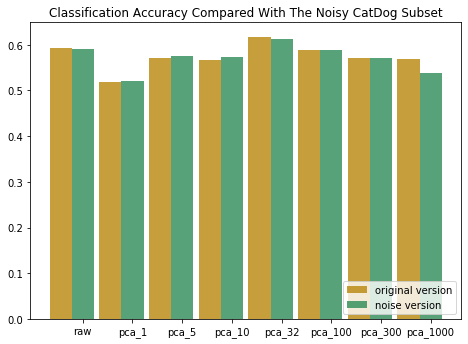

From the bar graph, we can see the accuracy of the noise version is generally similar to the original version
33
[ 33  91 150]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


training loss 1.7009403092479707
training loss 1.3169807390624284
accuracy_list [0.2976, 0.3681, 0.3434, 0.321, 0.3753, 0.3736, 0.4021, 0.4053, 0.5742]
train_time [1.27, 0.022, 0.036, 0.058, 53.736, 1.175, 1.523, 2.265, 57.395]
test_time [3.427, 0.017, 0.035, 0.088, 0.149, 0.004, 0.003, 0.011, 3.044]

we can see from the below bars, CNN has the highest accuracy,
the next is the Logistic Regression classifiers and the lowest is the Naive Bayes classifiers



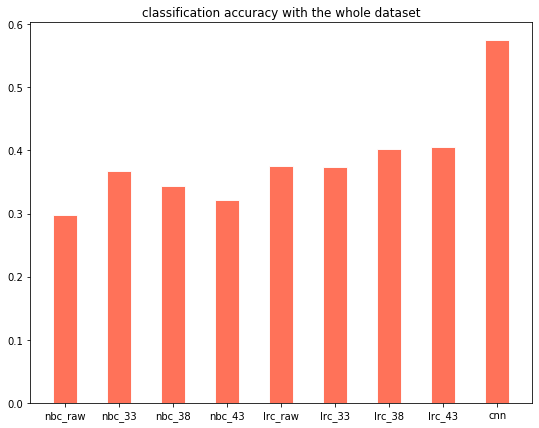

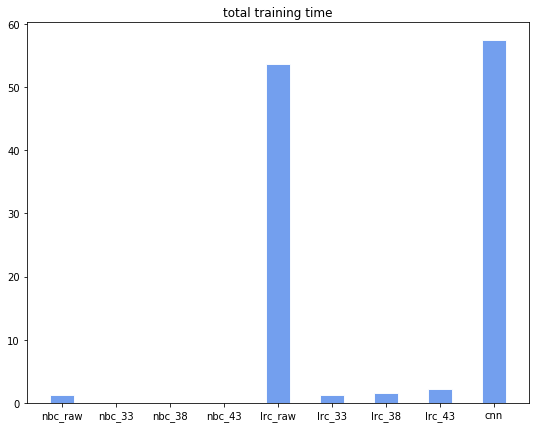

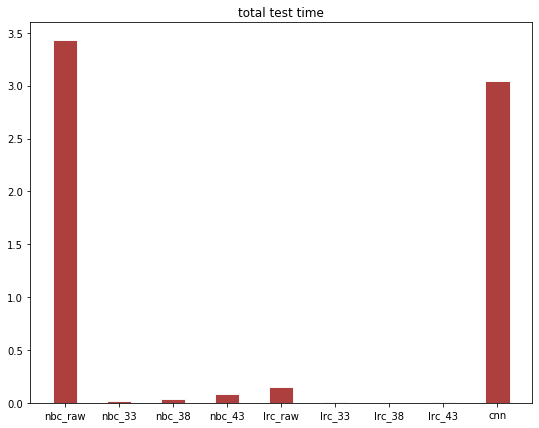

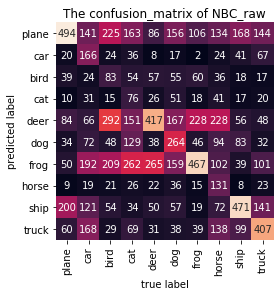

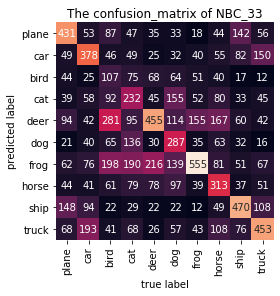

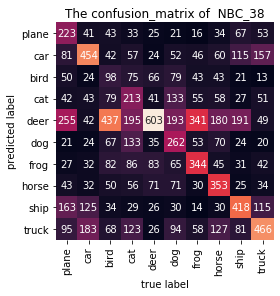

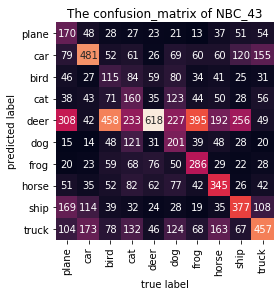

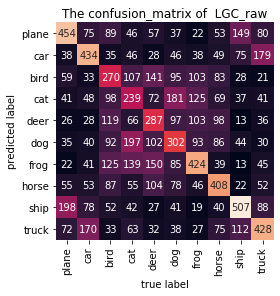

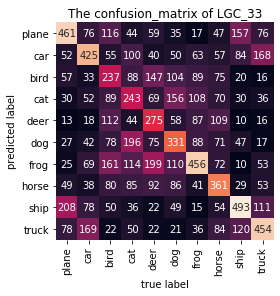

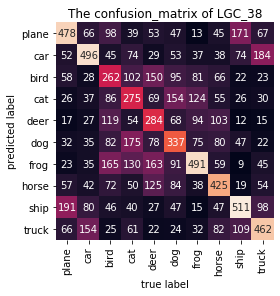

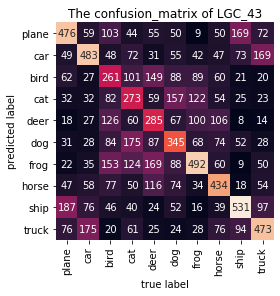

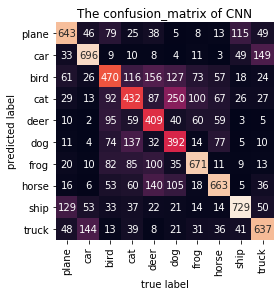

Three observations:

The first is the training time. Convoluational Neural Network(CNN)'s training time is longest.
The Logistic Regression on the original datas consumes the second longest time. 
The Naive Bayes generally consumes the shortest time.

The second is the test time. The Naive Bayes Clasifier on the original datas consumes the longest time.
Convoluational Neural Network(CNN)'s test time is the second longest.
While the Logistic Regression on the original datas consumes the third longest time.

The third is about confusion_matrix. Most of the greatest values are on the diagonal.
And the greatest value is generally on the top left corner or the lower right corner.
The CNN has the greastest value in all the confusion_matrixs.



In [7]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import torch.optim as optim
import time
from sklearn.metrics import accuracy_score

# 3a
x_train_noise, y_train_noise = iter(noise_trainloader_catdog).next()
x_train_noise_np = x_train_noise.numpy()
train_catdog_noise_reshape=x_train_noise_np.reshape((x_train_noise_np.shape[0],x_train_noise_np.shape[1]*x_train_noise_np.shape[2]*x_train_noise_np.shape[3]))
Y_train_noise = y_train_noise.numpy().flatten()

x_test_noise, y_test_noise = iter(noise_testloader_catdog).next()
x_test_noise_np = x_test_noise.numpy()
test_catdog_noise_reshape=x_test_noise_np.reshape((x_test_noise_np.shape[0],x_test_noise_np.shape[1]*x_test_noise_np.shape[2]*x_test_noise_np.shape[3]))
Y_test_noise = y_test_noise.numpy().flatten()

score_list_noise = []
pre_list_noise = []

def getAccuracyNoise(X, Xt):
    # training dtc
    nbc = GaussianNB()
    nbc.fit(X,Y_train_noise)
    # test accracy
    Xt_pred = nbc.predict(Xt)
    pre_list_noise.append(Xt_pred)
    cur_accuracy = metrics.accuracy_score(Y_test_noise, Xt_pred)
    score_list_noise.append(cur_accuracy)
getAccuracyNoise(train_catdog_noise_reshape, test_catdog_noise_reshape)

for k in k_set: 
    pca_object_noise = PCA(n_components = k)
    X_intmde_train_noise = pca_object_noise.fit_transform(train_catdog_noise_reshape)
    XT_intmde_train_noise = pca_object_noise.transform(test_catdog_noise_reshape)
    getAccuracyNoise(X_intmde_train_noise, XT_intmde_train_noise)
    
print(score_list_noise)
color01='darkgoldenrod'
color02 = 'seagreen'
lable_x = ['raw','pca_1','pca_5','pca_10','pca_32','pca_100','pca_300','pca_1000']
X_np = np.array(X)
Y1 = np.array(score_list)
Y2 = np.array(score_list_noise)
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(221)
xlocation =  np.linspace(1, 8 * 8, 8)
rects01 = ax1.bar(xlocation, Y1, width = 4, color=color01,linewidth=4,alpha=0.8)
rects02 = ax1.bar(xlocation+4,Y2 ,width = 4, color=color02,linewidth=4,alpha=0.8)
plt.xticks(xlocation+4,lable_x) 
plt.title('Classification Accuracy Compared With The Noisy CatDog Subset')
ax1.legend((rects01,rects02),('original version','noise version'), loc="lower right")
plt.show()
print('From the bar graph, we can see the accuracy of the noise version is generally similar to the original version')

# 3b
# choose the three values according to cumulative variance
x_train, y_train = iter(trainloader).next()
x_train = x_train.numpy()
x_train_reshape=x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
pca= PCA()
pca.fit(x_train_reshape)
x_train_components=0
total_train= sum(pca.explained_variance_)
current_sum_train=0
while current_sum_train/total_train < 0.8:
    current_sum_train += pca.explained_variance_[x_train_components]
    x_train_components +=1
print(x_train_components)
# we can get the value of x_train_components which is 33 
# so we can choose the following 3 values, 33, 38, 43 which have relatively high performance.
end_stop_train = 50 + 50*3 - 50
k_set_train = np.linspace(x_train_components,end_stop_train,num=3,dtype=int)
print(k_set_train)

# 3c
# test datas
x_test, y_test = iter(testloader).next()
x_test = x_test.numpy()
x_test_reshape=x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))
Y_test = y_test.numpy().flatten()
Y_train = y_train.numpy().flatten()

train_time = [] # init the list of whole training time
test_time = [] # init the list of whole test time
accuracy_list = [] # init the list of classification accuracy
predict_list = [] # init the list of prediction value
# define the training and prediction function of Naive Bayes classifier 
def classifierNB(X, Xt):
    # start time of training 
    time1 = time.time()
    # train the Gaussian model
    nbc = GaussianNB()
    nbc.fit(X,Y_train)
    # end time of training and start time of test
    time2 = time.time()
    # test the Gaussian model
    Xt_pred = nbc.predict(Xt)
    # end time of test
    time3 = time.time()
    predict_list.append(Xt_pred)
    train_time.append(round(time2 - time1, 3))
    test_time.append(round(time3 - time2, 3))
    score = accuracy_score(Y_test, Xt_pred)  
    accuracy_list.append(score)

# train the first Naive Bayes classifier on the original features
classifierNB(x_train_reshape, x_test_reshape)
# train another three Naive Bayes classifiers by pca
for k in k_set_train:
    pca_object = PCA(n_components = k)
    X_intmde_train = pca_object.fit_transform(x_train_reshape)
    XT_intmde_train = pca_object.transform(x_test_reshape)
    classifierNB(X_intmde_train, XT_intmde_train)

# define the training and prediction function of Logistic Regression classifier 
def classifierLR(X, Xt):
    # start time of training
    time1 = time.time()
    # train the LogisticRegression model
    logreg = LogisticRegression(C=1e5, solver='lbfgs',  multi_class='multinomial', max_iter=300)
    logreg.fit(X, Y_train)
    # end time of training and start time of test
    time2 = time.time()
    # test the LogisticRegression model
    Xt_pred = logreg.predict(Xt)
    predict_list.append(Xt_pred)
    # end time of test
    time3 = time.time()
    train_time.append(round(time2 - time1, 3))
    test_time.append(round(time3 - time2, 3))
    score = accuracy_score(Y_test, Xt_pred) 
    accuracy_list.append(score)

# train the first Logistic Regression classifiers on the original features
classifierLR(x_train_reshape, x_test_reshape)
# train another three Logistic Regression classifiers by pca
for k in k_set_train: 
    pca_object = PCA(n_components = k)
    X_intmde_train = pca_object.fit_transform(x_train_reshape)
    XT_intmde_train = pca_object.transform(x_test_reshape)
    classifierLR(X_intmde_train, XT_intmde_train)

# Convoluational Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# get the train_loader
train_origin = list(trainset)
train_loader = torch.utils.data.DataLoader(train_origin, batch_size=4, shuffle=True)
# train the Convoluational Neural Network
# start time of training
time_cnn_start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    itr_num = 0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        itr_num += 1
    print('training loss', running_loss/itr_num)
# end time of training
time_cnn_end = time.time()
train_time.append(round(time_cnn_end - time_cnn_start, 3))

# test the Convoluational Neural Network
correct=0 # init the number of right prediction
total=0
# test the CNN model
# start time of test
cnn_test_time1 = time.time()
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    cnn_predict = predicted.numpy().flatten()
    predict_list.append(cnn_predict)
# end time of test
cnn_test_time2 = time.time()
test_time.append(round(cnn_test_time2 - cnn_test_time1, 3))
accuracy_cnn = correct/total
accuracy_list.append(accuracy_cnn)
print('accuracy_list', accuracy_list)
print('train_time', train_time)
print('test_time', test_time) 

# 3d
print('\nwe can see from the below bars, CNN has the highest accuracy,\nthe next is the Logistic Regression classifiers and the lowest is the Naive Bayes classifiers\n')
X_9 = ['nbc_raw', 'nbc_33', 'nbc_38', 'nbc_43', 'lrc_raw', 'lrc_33', 'lrc_38', 'lrc_43', 'cnn']
X_9 = np.array(X_9) 

plt.figure(figsize=(9,7))
Y_accuracy = np.array(accuracy_list)
plt.bar(X_9, Y_accuracy, alpha=0.9, width = 0.45, facecolor = 'tomato', edgecolor = 'white')
plt.title('classification accuracy with the whole dataset')
plt.show()

plt.figure(figsize=(9,7))
Y_traintime = np.array(train_time)
plt.bar(X_9, Y_traintime, alpha=0.9, width = 0.45, facecolor = 'cornflowerblue', edgecolor = 'white')
plt.title('total training time')
plt.show()

plt.figure(figsize=(9,7))
Y_testtime = np.array(test_time)
plt.bar(X_9, Y_testtime, alpha=0.9, width = 0.45, facecolor = 'brown', edgecolor = 'white')
plt.title('total test time')
plt.show()

# 3e
# plot 9 confusion_matrix pictures
target_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
sub_names = ['The confusion_matrix of NBC_raw', 'The confusion_matrix of NBC_33', 'The confusion_matrix of  NBC_38', 'The confusion_matrix of NBC_43', 'The confusion_matrix of  LGC_raw', 'The confusion_matrix of LGC_33', 'The confusion_matrix of LGC_38', 'The confusion_matrix of LGC_43', 'The confusion_matrix of CNN']
for i, y_pred in enumerate(predict_list):
    mat = metrics.confusion_matrix(Y_test, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(sub_names[i])
    plt.show()
    
# 3f
print("Three observations:\n\nThe first is the training time. Convoluational Neural Network(CNN)'s training time is longest.\nThe Logistic Regression on the original datas consumes the second longest time. \nThe Naive Bayes generally consumes the shortest time.\n")
print("The second is the test time. The Naive Bayes Clasifier on the original datas consumes the longest time.\nConvoluational Neural Network(CNN)'s test time is the second longest.\nWhile the Logistic Regression on the original datas consumes the third longest time.\n")
print("The third is about confusion_matrix. Most of the greatest values are on the diagonal.\nAnd the greatest value is generally on the top left corner or the lower right corner.\nThe CNN has the greastest value in all the confusion_matrixs.\n")
  

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

average train err 0.028588603010949714
test mse 0.01762470705914311


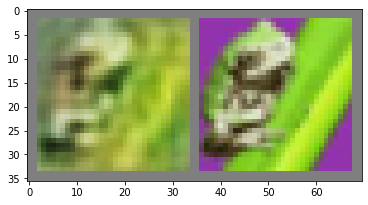

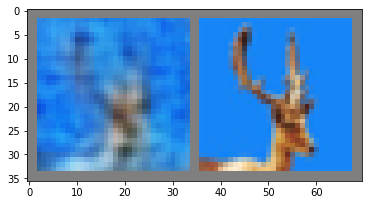

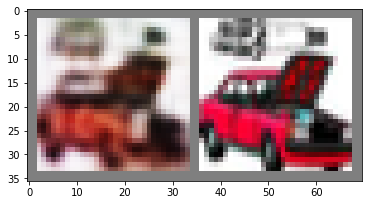

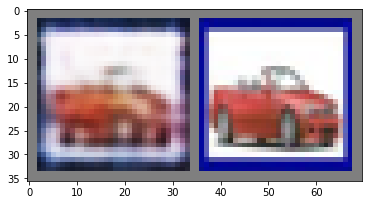

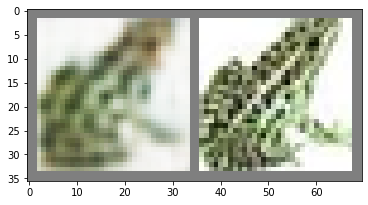

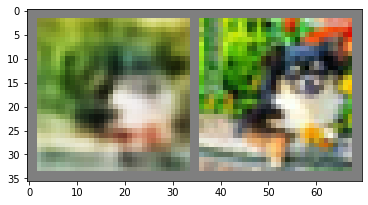

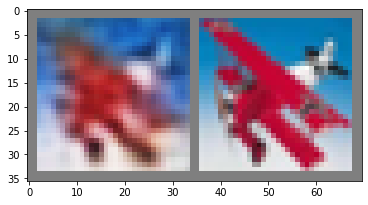

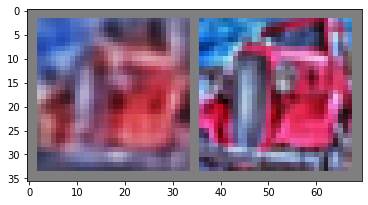

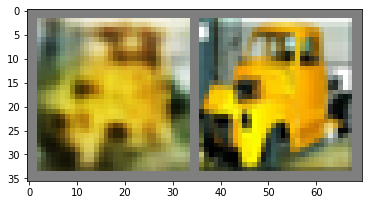

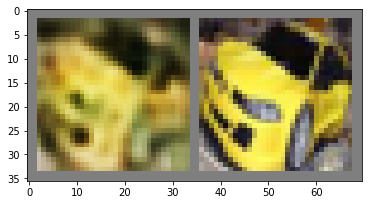

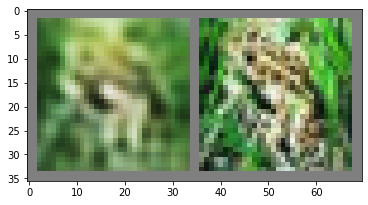

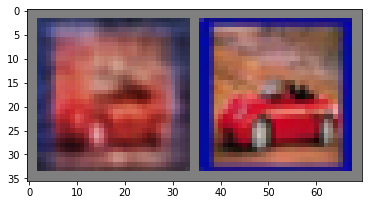

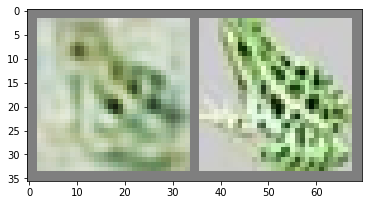

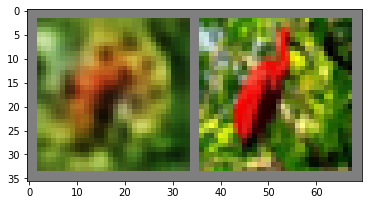

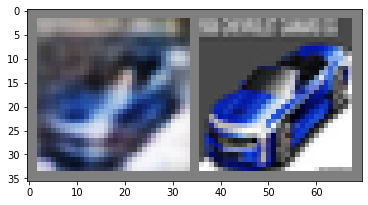

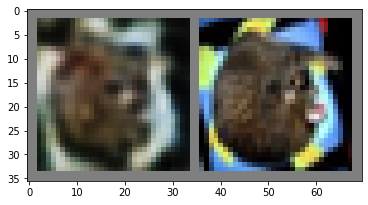

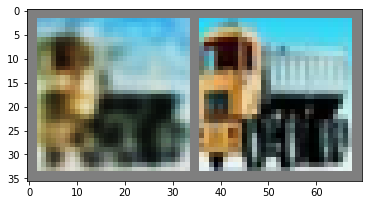

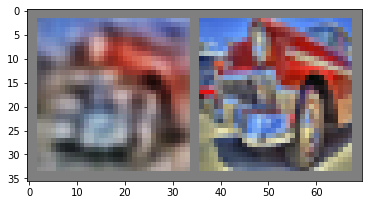

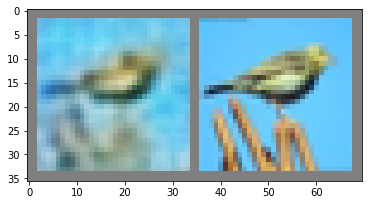

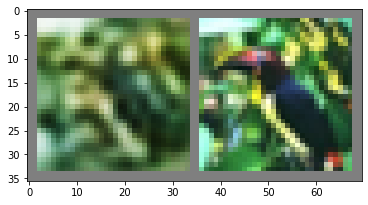

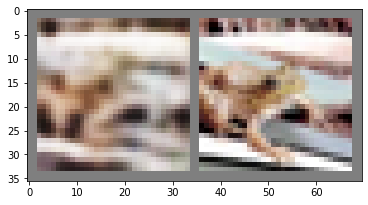

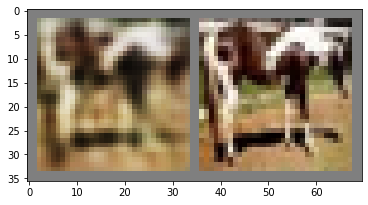

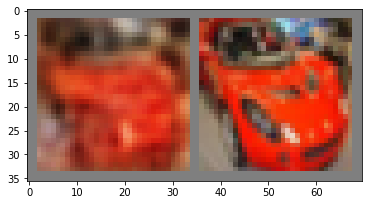

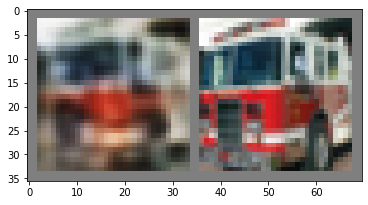

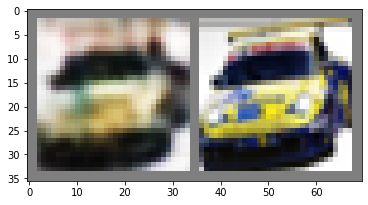

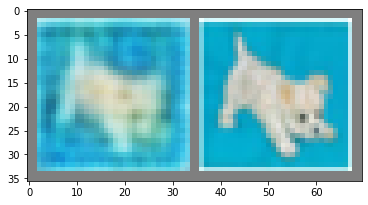

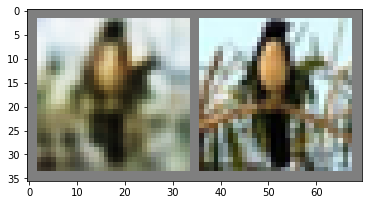

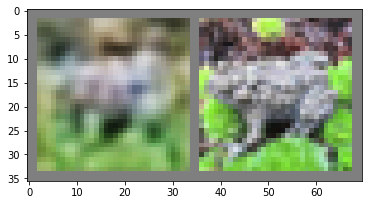

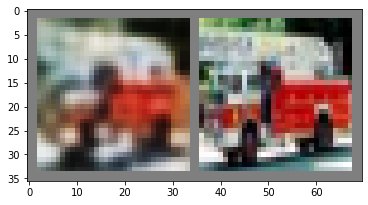

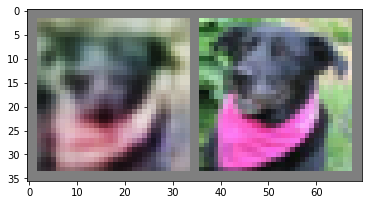

First, we can choose batch_size as 32, 64, 96, while learning_rate is 1e-3 and max_epochs is 3.

Then we can get the test mse as 0.0177, 0.0201, 0.0233 by repeating previous steps.

Second, we can choose learning_rate as 1e-1, 1e-2, 1e-3, while batch_size is 32 and max_epochs is 3.

Then we can get the test mse as 1.2576, 0.0259, 0.0177 by repeating previous steps.

Third, we can choose max_epochs as 1, 2, 3, while batch_size is 32 and while learning_rate is 1e-3.

Then we can get the test mse as 0.0275, 0.0193, 0.0177 by repeating previous steps.



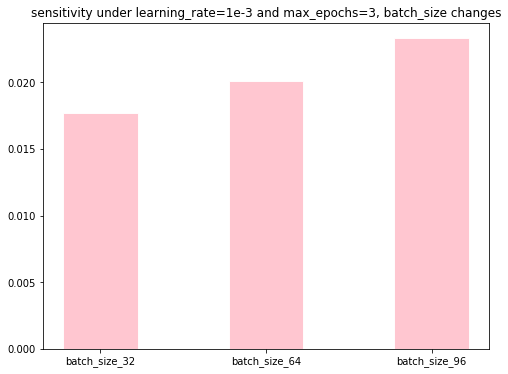

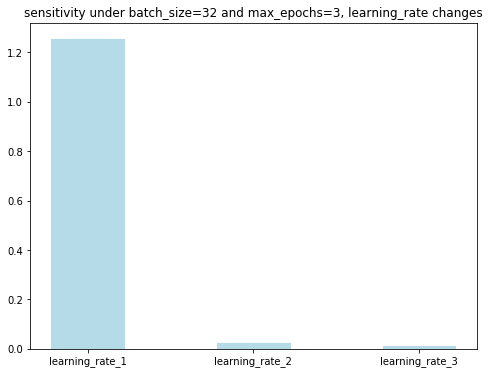

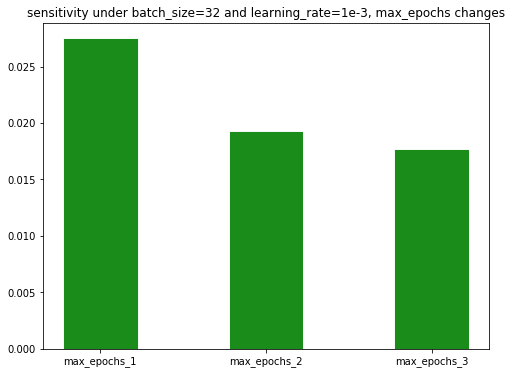

Two observations:

The first is the max_epochs. When we increase the max_epochs form 1 to 3, the mse would decline which means the sensitivity would improve and the denoise effect is better.
However, when we increase the max_epochs over 3, the mse would reduce slowly and the running time keeps increasing a lot.
So I choose 3 as the max_epochs.

The second is the learning rate. When the learning rate is 1e-1, the mse is super great which means denoising effect is bad.
When we reduce the value, the mse will reduce sharply.
And when we contiue reducing the learning rate, the mse would drop down slowly and finally converge.


In [8]:
### 4a
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = (x-0.5)/0.5 
        return x
    
myAE=Autoencoder()
params = list(myAE.parameters())

# 4b
#Hyperparameters for training
batch_size=32
learning_rate=1e-3
max_epochs = 3
 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling), so the loss would be a little different after each running code
train_origin = list(trainset)
train_loader = torch.utils.data.DataLoader(train_origin, batch_size=batch_size, shuffle=True)
   
# calculate train err
train_total_loss = 0
itr_train = 0
for epoch in range(max_epochs):
    for data in train_loader:
        img, label = data
        # add noise on the train image
        img_noise = img + torch.randn(img.size()) * scale
        img_noise_np = img_noise.numpy()
        # normalize
        img_noise = np.clip(img_noise_np, -1, 1)
        img_noise = torch.from_numpy(img_noise)
        optimizer.zero_grad()
        recon = myAE(img_noise)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step() 
        train_total_loss += float(loss)
        itr_train += 1
print('average train err', train_total_loss/itr_train)

# 4c
# use test data to generate denoised images
test_origin = list(testset)
test_loader = torch.utils.data.DataLoader(test_origin, batch_size=1, shuffle=True)
test_mse = 0 # init the mse
test_itr = 0 # init the iterate number
test_outputs = []
for data in test_loader:
    img, label = data
    # add noise on the test image
    img_noise = img + torch.randn(img.size()) * scale
    img_noise_np = img_noise.numpy()
    # normalize
    img_noise = np.clip(img_noise_np, -1, 1)
    img_noise = torch.from_numpy(img_noise)
    # denoise img
    recon = myAE(img_noise)
    # mse 
    loss = criterion(recon, img)
    loss.backward()
    test_mse += float(loss)
    test_itr += 1
    test_outputs.append((float(loss), recon, img))
print('test mse', test_mse/test_itr)
    
test_outputs.sort(key=lambda x: x[0], reverse=True)

def ShowImg(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
for item in test_outputs[:30]: 
    recon = item[1].detach().numpy()
    img = item[2].detach().numpy()
    # normalize
    recon_normalize = np.clip(recon, -1, 1)
    img_normalize = np.clip(img, -1, 1)
    image_pair = torch.cat([torch.from_numpy(recon_normalize), torch.from_numpy(img_normalize)],dim=0)
    ShowImg(image_pair)
    plt.show()
    
# 4d
# The mse would be a little different each time we runs the code for we shuffle the dataset.
print('First, we can choose batch_size as 32, 64, 96, while learning_rate is 1e-3 and max_epochs is 3.\n')
print('Then we can get the test mse as 0.0177, 0.0201, 0.0233 by repeating previous steps.\n')
print('Second, we can choose learning_rate as 1e-1, 1e-2, 1e-3, while batch_size is 32 and max_epochs is 3.\n')
print('Then we can get the test mse as 1.2576, 0.0259, 0.0177 by repeating previous steps.\n')
print('Third, we can choose max_epochs as 1, 2, 3, while batch_size is 32 and while learning_rate is 1e-3.\n')
print('Then we can get the test mse as 0.0275, 0.0193, 0.0177 by repeating previous steps.\n')

plt.figure(figsize=(8,6))
X = ['batch_size_32', 'batch_size_64', 'batch_size_96']
X = np.array(X)
Y = [0.0177, 0.0201, 0.0233]
Y = np.array(Y)
plt.bar(X, Y, alpha=0.9, width = 0.45, facecolor = 'pink', edgecolor = 'white')
plt.title('sensitivity under learning_rate=1e-3 and max_epochs=3, batch_size changes')
plt.show()

plt.figure(figsize=(8,6))
X = ['learning_rate_1', 'learning_rate_2', 'learning_rate_3']
X = np.array(X)
Y = [1.2576, 0.0259, 0.0177]
Y = np.array(Y)
plt.bar(X, Y, alpha=0.9, width = 0.45, facecolor = 'lightblue', edgecolor = 'white')
plt.title('sensitivity under batch_size=32 and max_epochs=3, learning_rate changes')
plt.show()

plt.figure(figsize=(8,6))
X = ['max_epochs_1', 'max_epochs_2', 'max_epochs_3']
X = np.array(X)
Y = [0.0275, 0.0193, 0.0177]
Y = np.array(Y)
plt.bar(X, Y, alpha=0.9, width = 0.45, facecolor = 'green', edgecolor = 'white')
plt.title('sensitivity under batch_size=32 and learning_rate=1e-3, max_epochs changes')
plt.show()

# 4f
print('Two observations:\n\nThe first is the max_epochs. When we increase the max_epochs form 1 to 3, the mse would decline which means the sensitivity would improve and the denoise effect is better.\nHowever, when we increase the max_epochs over 3, the mse would reduce slowly and the running time keeps increasing a lot.\nSo I choose 3 as the max_epochs.\n')
print('The second is the learning rate. When the learning rate is 1e-1, the mse is super great which means denoising effect is bad.\nWhen we reduce the value, the mse will reduce sharply.\nAnd when we contiue reducing the learning rate, the mse would drop down slowly and finally converge.')
